In [1]:
from pairtrader import *

In [2]:
close = pd.read_csv('data/crypto_1m.csv', index_col='unix') # reads the closing prices of 129 stocks from the energy sector
close.shape # N closing prices, 17 different symbols

(258945, 17)

In [3]:
# choose a pair; refer to our heatmap to choose a cointegrated pair
# use 48 hours; first 24 for model fit, last 24 for model test
# Order matters slightly! Ideally order by how regression for adf test was ordered.
X = close['ada'][-60*24*2:]
Y = close['bnb'][-60*24*2:]

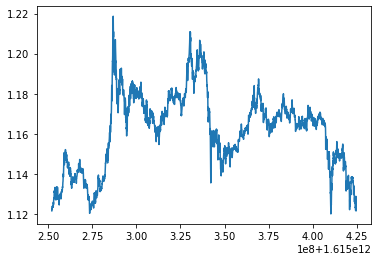

In [4]:
plt.plot(X)

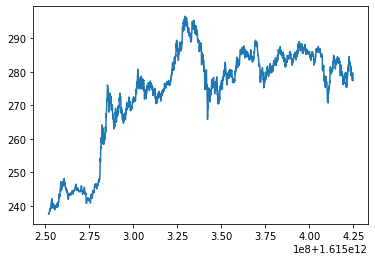

In [5]:
plt.plot(Y)

In [6]:
# params
z_crit = 2
z_sl = 1
z_tp = 1
window = 60
trade_size = 100
trainval_split = len(X)//2
pause_after_sl = 10
# first half of split meets model assumptions by adf test (reject unit root = 1)
# first half of split is training set used to fit Y ~ X
# second half of split is validation set where trading occurs

In [7]:
pt = PairTrader(X, Y, z_crit, z_sl, z_tp, trainval_split, window, trade_size, pause_after_sl=pause_after_sl)

In [8]:
pt.fit_model()

In [9]:
account, logs = pt.test_model()

In [10]:
print('Cash Balance:', account.cash_balance)
print('Asset Balance:', account.asset_balance)
print('Total Balance:', account.total_balance)
print('Open Positions:', account.positions)
longs = [i[0] for i in logs if i[1]['status'] == 'L']
shorts = [i[0] for i in logs if i[1]['status'] == 'S']
stop_loss = [i[0] for i in logs if i[1]['status'] == 'SL']
take_profit = [i[0] for i in logs if i[1]['status'] == 'TP']
print('Losses:', len(stop_loss))
print('Profits:', len(take_profit))

Cash Balance: 109.00203701385834
Asset Balance: 0
Total Balance: 109.00203701385834
Open Positions: {}
Losses: 18
Profits: 19


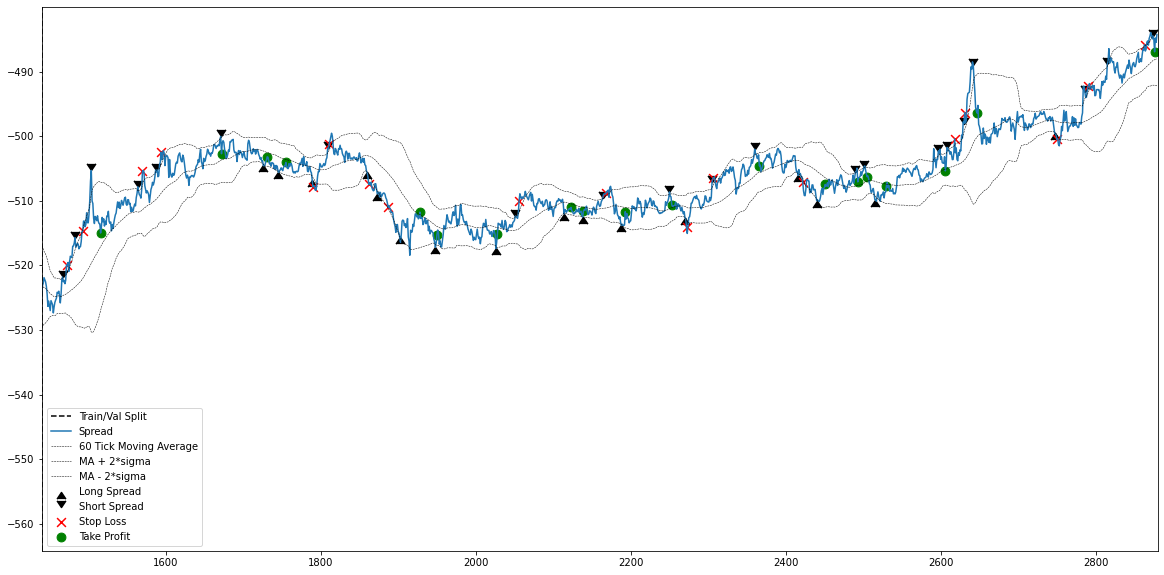

In [11]:
spread_plot = pt.plot('spread', zoom=True)

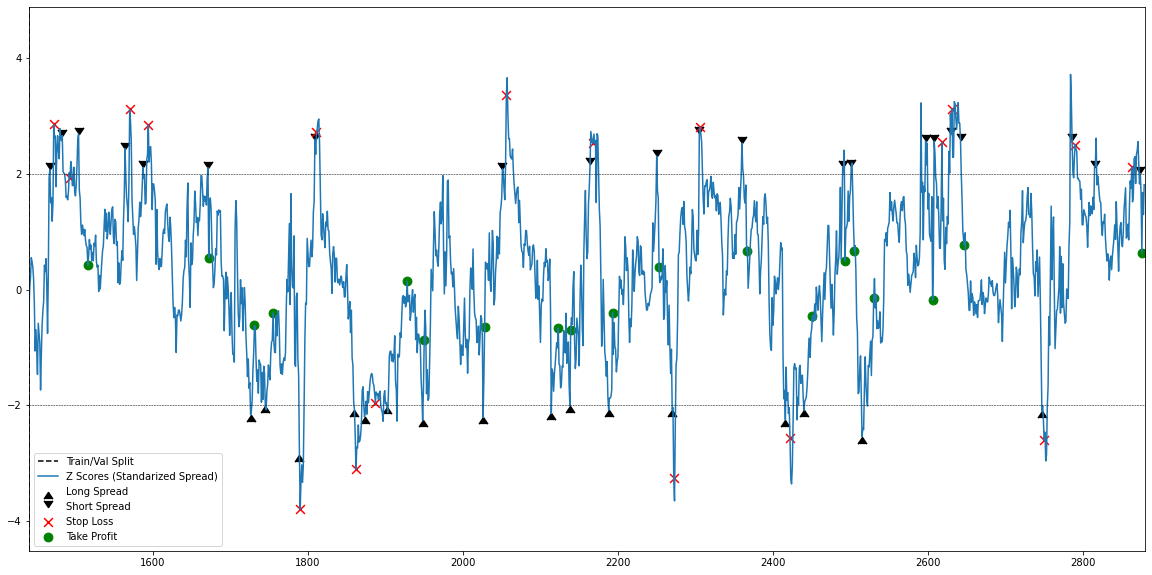

In [12]:
z_plot = pt.plot('z', zoom=True)

In [13]:
df = pt.get_df()
df

,status,spread,stoploss,takeprofit,balance,diffs
1467,S,-521.806529,-520.524202,-523.285846,100.000000,NaN
1472,SL,-519.921794,NaN,NaN,99.334928,-0.665072
1483,S,-515.689239,-514.698328,-520.447384,99.334928,0.000000
1493,SL,-514.694295,NaN,NaN,98.975165,-0.359763
1504,S,-505.279159,-503.568281,-514.267141,98.975165,0.000000
...,...,...,...,...,...,...
2790,SL,-492.285160,NaN,NaN,109.172227,-0.311219
2815,S,-488.818340,-486.245596,-492.046321,109.172227,0.000000
2863,SL,-485.831423,NaN,NaN,108.098013,-1.074214
2874,S,-484.409257,-482.502391,-486.330172,108.098013,0.000000


(array([ 1.,  1.,  0.,  0.,  2.,  0.,  0.,  1.,  1.,  2.,  0.,  1.,  1.,
         0.,  2.,  2.,  1.,  2.,  1.,  0.,  0.,  0., 36.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  2.,  0.,  1.,  1.,  2.,  0.,  0.,  2.,  2.,
         1.,  0.,  3.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-1.07421426, -1.02701796, -0.97982166, -0.93262536, -0.88542906,
        -0.83823276, -0.79103646, -0.74384016, -0.69664386, -0.64944756,
        -0.60225125, -0.55505495, -0.50785865, -0.46066235, -0.41346605,
        -0.36626975, -0.31907345, -0.27187715, -0.22468085, -0.17748455,
        -0.13028825, -0.08309195, -0.03589565,  0.01130065,  0.05849695,
         0.10569325,  0.15288956,  0.20008586,  0.24728216,  0.294478

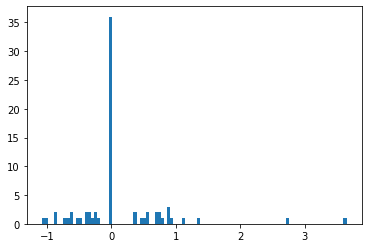

In [14]:
plt.hist(df['diffs'], bins=100)